### This is a project on Credit Card Default that explores or makes predictions on whether a customer defaults or not defaults in terms of the payment of money borrowed using RandomForestClassifier

In [90]:
# Importing the dependencies for the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Loading the dataset

In [67]:
credit_data = pd.read_csv("credit-card-default.csv")

### Performing Data Exploratory Analysis

In [68]:
# Loading the first 5 rows of the data
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [69]:
# Shape of the data: 30000 features and 25 feature columns
credit_data.shape


(30000, 25)

In [70]:
# Obtaining Information about the data
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [72]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [73]:
# Obtaining some statistics about the dataset
credit_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [74]:
# Checking for empty features
credit_data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

In [75]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [76]:
# Eliminating the ID section of the datasample
credit_data = credit_data.drop("ID", axis = 1)

In [77]:
credit_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [78]:
## Separating the predicated class column from the dataset
# X - feature variables
# y - response variables
X = credit_data.drop("defaulted", axis = 1)
y  = credit_data["defaulted"] 
# Defaulted values of:
# 0----> Good credit history
# 1----> Bad credit history

In [79]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [80]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: defaulted, dtype: int64

### Building First Random_Forest Model with Default Parameters


In [82]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [84]:
X_train.shape

(21000, 23)

In [86]:
# Loading our Model
from sklearn.ensemble import RandomForestClassifier

In [87]:
RFC = RandomForestClassifier() # Loading the model

In [88]:
# Fitting the model
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
# Making predictions on the test dataset
y_test_pred = RFC.predict(X_test)

In [92]:
# Checking for the classification_report of the dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      6927
           1       0.66      0.38      0.48      2073

    accuracy                           0.81      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.79      0.81      0.79      9000



In [93]:
# Printing the confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[6513  414]
 [1281  792]]


In [94]:
# Checking for the accuracy of the dataset : 0.8116
print(accuracy_score(y_test, y_test_pred))

0.8116666666666666


### Hyperparameter Tunning of the Variables: Bagging Process Hyperparameters and DecisionTree Hyperparameters

In [95]:
### DecisionTree Hyperparameters:
from sklearn.model_selection import KFold, GridSearchCV

In [97]:
# Specifying number of k-folds CV
n_folds = 5
# parameter to tune model
param = {"max_depth": range(2,10,1)}

# Loading instance of model
rf = RandomForestClassifier()

# Initializing GridSearchCV
rf =GridSearchCV(rf, param_grid = param, cv = n_folds, n_jobs = -1, scoring = "accuracy", return_train_score = True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10)}, return_train_score=True,
             scoring='accuracy')

In [98]:
# Scores of GridSearchCV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.062485,0.073410,0.060474,0.005804,2,{'max_depth': 2},0.802619,0.798571,0.802857,0.801190,...,0.801667,0.001684,8,0.800179,0.803036,0.801667,0.801964,0.803750,0.802119,0.001224
1,4.025452,0.353259,0.101640,0.011946,3,{'max_depth': 3},0.811190,0.808810,0.813810,0.808095,...,0.809762,0.002461,7,0.810833,0.811429,0.811548,0.810536,0.809226,0.810714,0.000832
2,5.316277,0.717448,0.115776,0.044241,4,{'max_depth': 4},0.815476,0.812381,0.816190,0.809048,...,0.813524,0.002579,6,0.815714,0.816190,0.816488,0.815655,0.813869,0.815583,0.000911
3,5.838250,0.251342,0.102894,0.010868,5,{'max_depth': 5},0.816190,0.812619,0.816905,0.813095,...,0.815048,0.001810,5,0.819881,0.820000,0.819345,0.821071,0.818810,0.819821,0.000755
4,7.992068,1.187019,0.236561,0.198100,6,{'max_depth': 6},0.820476,0.820000,0.818810,0.811667,...,0.817381,0.003261,4,0.829881,0.831488,0.824702,0.827143,0.830655,0.828774,0.002505


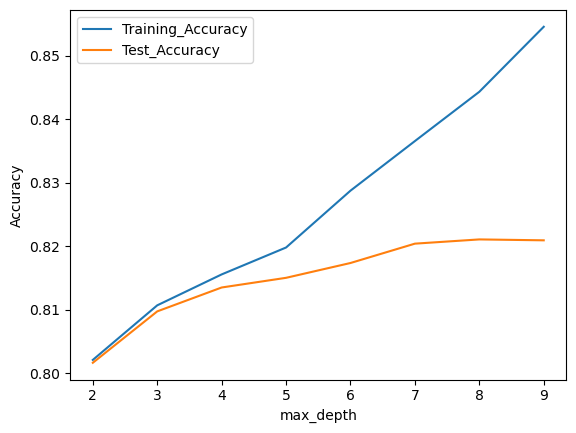

In [99]:
# Making plot of the accuracies of the max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label = "Training_Accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label = "Test_Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tunning the n_estimators

In [102]:
# Specifying number of k-folds CV
n_folds = 5
# parameter to tune model
param = {"n_estimators": range(100, 1000, 150)}

# Loading instance of model
rf = RandomForestClassifier(max_depth = 5)

# Initializing GridSearchCV
rf =GridSearchCV(rf, param_grid = param, cv = n_folds, n_jobs = -1, scoring = "accuracy", return_train_score = True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5), n_jobs=-1,
             param_grid={'n_estimators': range(100, 1000, 150)},
             return_train_score=True, scoring='accuracy')

In [103]:
scores_1 = rf.cv_results_
pd.DataFrame(scores_1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.751792,0.349328,0.126326,0.019055,100,{'n_estimators': 100},0.819048,0.812381,0.819762,0.811905,...,0.816762,0.003811,1,0.824345,0.818929,0.820595,0.820060,0.824702,0.821726,0.002349
1,13.707076,0.814257,0.375820,0.145472,250,{'n_estimators': 250},0.816667,0.813810,0.817143,0.812619,...,0.815476,0.001893,3,0.818393,0.819167,0.819167,0.819107,0.819167,0.819000,0.000304
2,25.013656,2.811846,0.404495,0.061011,400,{'n_estimators': 400},0.815238,0.813571,0.816190,0.812857,...,0.814905,0.001472,6,0.818452,0.819345,0.817798,0.818750,0.819345,0.818738,0.000584
3,31.680311,3.560545,0.519227,0.068905,550,{'n_estimators': 550},0.816905,0.812619,0.818095,0.813810,...,0.815762,0.002148,2,0.821429,0.822738,0.818690,0.822202,0.819583,0.820929,0.001547
4,36.426539,3.759975,0.634509,0.089229,700,{'n_estimators': 700},0.816429,0.813810,0.817143,0.812381,...,0.815238,0.001826,5,0.818036,0.819583,0.818512,0.819524,0.819524,0.819036,0.000640


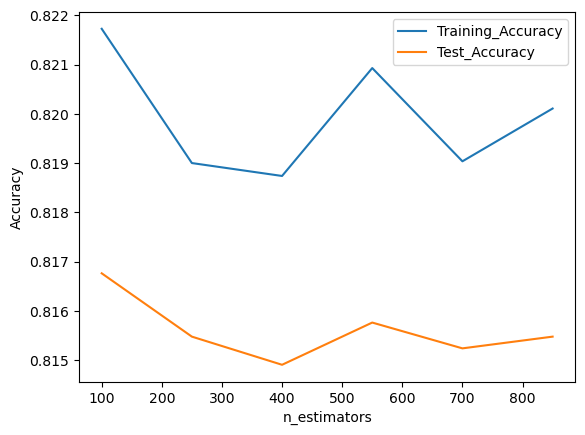

In [104]:
# Making plot of the accuracies of the n_estimators
plt.figure()
plt.plot(scores_1["param_n_estimators"], scores_1["mean_train_score"], label = "Training_Accuracy")
plt.plot(scores_1["param_n_estimators"], scores_1["mean_test_score"], label = "Test_Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tunning the Max_Features

In [105]:
# Specifying number of k-folds CV
n_folds = 5
# parameter to tune model
param = {"max_features": [4, 8, 14, 20, 24]}

# Loading instance of model
rf = RandomForestClassifier(max_depth = 5, n_estimators = 250)

# Initializing GridSearchCV
rf =GridSearchCV(rf, param_grid = param, cv = n_folds, n_jobs = -1, scoring = "accuracy", return_train_score = True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=250),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [106]:
scores_2 = rf.cv_results_
pd.DataFrame(scores_2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.466645,0.474478,0.333277,0.059229,4,{'max_features': 4},0.815714,0.814286,0.817857,0.811429,...,0.815524,0.002517,5,0.817798,0.819583,0.819167,0.819821,0.819762,0.819226,0.000750
1,27.122319,1.075534,0.259180,0.083252,8,{'max_features': 8},0.821667,0.819048,0.827619,0.820714,...,0.821619,0.003164,1,0.827143,0.828988,0.826786,0.827560,0.828155,0.827726,0.000778
2,42.781308,4.499539,0.259758,0.043275,14,{'max_features': 14},0.821429,0.818333,0.828095,0.821190,...,0.821619,0.003452,1,0.827857,0.828750,0.827857,0.828750,0.828512,0.828345,0.000408
3,59.570258,2.602435,0.236868,0.046210,20,{'max_features': 20},0.821667,0.818571,0.826667,0.820000,...,0.821286,0.002871,4,0.828631,0.829226,0.828631,0.829286,0.828750,0.828905,0.000291
4,57.273281,8.973517,0.122279,0.033178,24,{'max_features': 24},0.822857,0.817619,0.826905,0.821667,...,0.821571,0.003267,3,0.829405,0.829226,0.828929,0.830298,0.828393,0.829250,0.000626


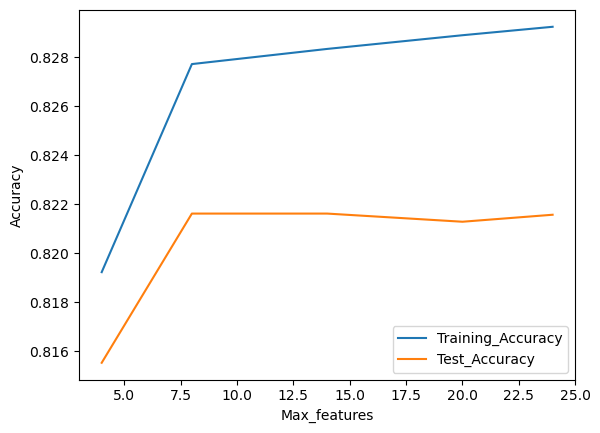

In [107]:
# Making plot of the accuracies of the Max_features
plt.figure()
plt.plot(scores_2["param_max_features"], scores_2["mean_train_score"], label = "Training_Accuracy")
plt.plot(scores_2["param_max_features"], scores_2["mean_test_score"], label = "Test_Accuracy")
plt.xlabel("Max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [110]:
# General case for Hyperparmater Tunnings
param_grid = {"max_depth": [3, 8, 1], "min_samples_leaf": range(100, 400, 100), "min_samples_split": range(200, 500, 100),
              "n_estimators": [100, 1000, 150], "max_features": [5, 10, 1]}

# Creating the Model
rf = RandomForestClassifier()
Grid_search = GridSearchCV(estimator = rf , param_grid = param_grid, cv = 3, n_jobs =-1, return_train_score = True, verbose = 1)

In [111]:
# Fitting the model
Grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 8, 1], 'max_features': [5, 10, 1],
                         'min_samples_leaf': range(100, 400, 100),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 1000, 150]},
             return_train_score=True, verbose=1)

In [112]:
# Printing out the best value parameters and accuracy:
print("Accuracy_score: ", Grid_search.best_score_, "using", Grid_search.best_params_)

Accuracy_score:  0.8220952380952381 using {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 300, 'min_samples_split': 200, 'n_estimators': 1000}


### Fitting the model with the best hyperparamters

In [113]:
rfc = RandomForestClassifier(bootstrap = True, max_depth = 3, max_features = 10, min_samples_leaf = 300,
                             min_samples_split = 200, n_estimators = 1000)

In [114]:
# Fitting the optimized model with the dataset
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=10, min_samples_leaf=300,
                       min_samples_split=200, n_estimators=1000)

In [115]:
# Making predictions on the Trained Model
y_test_pred = rfc.predict(X_test)

In [116]:
# Evaluating our models performance
# Accuracy:
print(accuracy_score(y_test, y_test_pred))

0.8158888888888889


In [118]:
# Classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6927
           1       0.71      0.34      0.46      2073

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.80      0.82      0.79      9000



In [119]:
# Confusion_Matrix
print(confusion_matrix(y_test, y_test_pred))

[[6629  298]
 [1359  714]]


In [120]:
# Making predictions on the training dataset
y_train_pred = rfc.predict(X_train)

In [121]:
# Accuracy score:
print(accuracy_score(y_train, y_train_pred))

0.8221428571428572


In [123]:
# Classification on the training dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89     16437
           1       0.69      0.33      0.45      4563

    accuracy                           0.82     21000
   macro avg       0.76      0.65      0.67     21000
weighted avg       0.81      0.82      0.80     21000



In [124]:
# Confusion_matrix
print(confusion_matrix(y_train, y_train_pred))

[[15741   696]
 [ 3039  1524]]
